In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

Данные ОДУ:

1. $xy' + x^2 + xy - y = 0$
2. $y' + y = xy^3$
3. $yy' + y^2ctg(x) = cos(x)$

Аналитические решения:
    

1. $y(x) = C * e^{-x}*x - x$
2. $y(x) = \frac{-\sqrt{2}}{\sqrt{C * e^{2x} + 2x + 1}}$
3. $y(x) = -\frac{(\sqrt{sin(x)} \sqrt{C * csc^3(x) + 2}}{\sqrt{3}}$

#### Задача Коши для ОДУ первого порядка

Задача Коши состоит в нахождении решения (интеграла) дифференциального уравнения, удовлетворяющего так называемым начальным условиям (начальным данным).

$
\begin{cases}
 & F(x,y,y') = 0 \\ 
 & y(x_0) = y_0  
\end{cases}
$

Зададим начальные условия:

1. $y(1) = 2$
2. $y(1) = -1$
3. $y(1.1) = -0.1$

Определим функции первых производных

In [54]:
def function_1(x, y):
    return (-1 * x - y + y / x)

def function_2(x, y):
    return (x * y**3 - y)

def function_3(x, y):
    return (math.cos(x) / y - y * (math.cos(x) / math.sin(x)))

#### Метод Эйлера

Метод Эйлера — простейший численный метод решения систем обыкновенных дифференциальных уравнений. Является явным, одношаговым методом первого порядка точности. Он основан на аппроксимации интегральной кривой кусочно-линейной функцией, так называемой ломаной Эйлера.

Метод Эйлера является методом первого порядка — имеет погрешность на шаге $O(h^2)$  и погрешность в целом $O(h)$.
Ввиду невысокой точности и вычислительной неустойчивости для практического нахождения решений задачи Коши метод Эйлера применяется редко.

In [56]:
def euler(func, x0, y0, x, h=0.01):
    while x0 < x:
        y0 = y0 + h * func(x0, y0)
        x0 = x0 + h
    return y0

Найдем значения функций $y_1(1.2), y_2(1.2), y_3(2)$ методом Эйлера

In [57]:
print(f"function_1: y(1.2) = {euler(function_1, x0=1, y0=2, x=1.2)}")
print(f"function_1: y(1.2) = {euler(function_2, x0=1, y0=-1, x=1.2)}")
print(f"function_1: y(2) = {euler(function_3, x0=1.1, y0=-0.1, x=2)}")

function_1: y(1.2) = 1.749867588959271
function_1: y(1.2) = -1.022146997799891
function_1: y(2) = -0.24968536878621622


#### Метод Рунге-Кутты

Метод Рунге-Кутты четвертого порядка — наиболее распространенный метод из семейства методов Метод Рунге-Кутты численных алгоритмов решения обыкновенных дифференциальных уравнений и их систем. Формально, методом Рунге-Кутты является модифицированный и исправленный метод Эйлера, они представляют собой схемы второго порядка точности.

Основная идея алгоритмов Рунге - Кутты состоит в замене правой части дифференциального уравнения, зависящей от искомой неизвестной функции, некоторым приближением.

In [58]:
def rungeKutta(func, x0, y0, x, h=0.1):
    n = (int)((x - x0)/h)
    y = y0
    for i in range(1, n + 1):
        k1 = h * func(x0, y)
        k2 = h * func(x0 + 0.5 * h, y + 0.5 * k1)
        k3 = h * func(x0 + 0.5 * h, y + 0.5 * k2)
        k4 = h * func(x0 + h, y + k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
        x0 = x0 + h
    return y

Найдем значения функций $y_1(1.2), y_2(1.2), y_3(2)$ методом Рунге-Кутты 4-ого порядка

In [59]:
print(f"function_1: y(1.2) = {rungeKutta(function_1, x0=1, y0=2, x=1.2)}")
print(f"function_1: y(1.2) = {rungeKutta(function_2, x0=1, y0=-1, x=1.2)}")
print(f"function_1: y(2) = {rungeKutta(function_3, x0=1.1, y0=-0.1, x=2, h=0.2)}")

function_1: y(1.2) = 1.885963667285096
function_1: y(1.2) = -1.0053938606601367
function_1: y(2) = -0.42049641320838416


#### Тестирование и графики

In [60]:
def draw_plot(x, euler_y, rungeKutta_y, func_name):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_axes([0,0,1,1])
    ax.grid()
    ax.plot(x, euler_y, 'r', label='Метод Эйлера')
    ax.plot(x, rungeKutta_y, 'b', label='Метод Рунге-Кутты')
    ax.set_xlabel("x")
    ax.set_ylabel("y");
    ax.set_title(func_name)
    fig

Формализуем задачу Коши для заданных функций

In [61]:
cauchy_problems = [{'func': function_1, 'begin': 1, 'end': 1.5, 'x0': 1, 'y0': 2},
       {'func': function_2, 'begin': 1, 'end': 1.5, 'x0': 1, 'y0': -1},
       {'func': function_3, 'begin': 1, 'end': 1.5, 'x0': 1.1, 'y0': -0.1}]

Решение и построение графиков в установленных интервалах

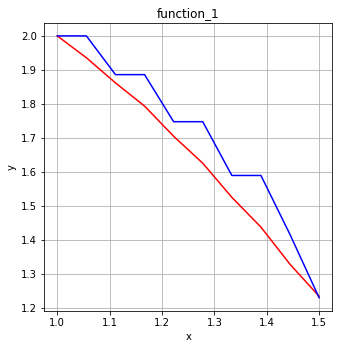

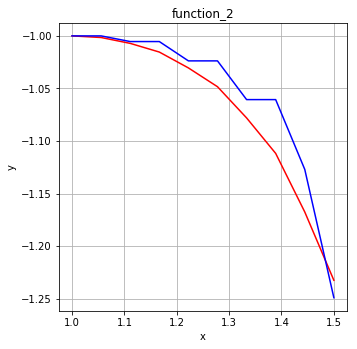

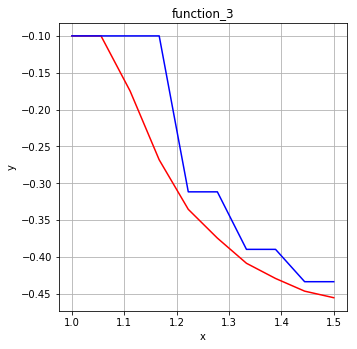

In [62]:
for problem in cauchy_problems:
    x_list = []
    euler_sols = []
    rungeKutta_sols = []
    for x in np.linspace(problem['begin'], problem['end'], 10):
        x_list.append(x)
        res = euler(problem['func'], x0=problem['x0'], y0=problem['y0'], x=x)
        euler_sols.append(res)
        res = rungeKutta(problem['func'], x0=problem['x0'], y0=problem['y0'], x=x)
        rungeKutta_sols.append(res)
    draw_plot(x_list, euler_sols, rungeKutta_sols, problem['func'].__name__)